(своя тема)
Это анализатор для трех сообществ вконтакте (лингвистическое, футбольное и новостное). 
Для каждого сообщества программа находит и визуализирует следующие параметры:
1. семантическое поле, где начальный узел - самое популярное прилагательное за последние 100 постов (граф)
2. 10 ближайших слов в семантическом поле (облако слов)

In [1]:
import urllib.request
import json
import re
import os
from pymystem3 import Mystem
import gensim
from gensim.models import word2vec
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import style
from collections import Counter
import nltk
from nltk.corpus import stopwords
from PIL import Image
import numpy as np
from wordcloud import WordCloud

In [2]:
def words():
    vk_ids = ['-46299096', '-217557', '-76982440']
    tops = ''

    for i in vk_ids:
        vk_id = i
        token = 'ce9bbc81ce9bbc81ce9bbc81f7cef1aec5cce9bce9bbc8192236d' \
                '27163fe4bf62eb1946'
        req = urllib.request.Request('https://api.vk.com/method/wall.get'
                                     '?owner_id=%s&count=100&access_token='
                                     '%s&v=5.95' % (vk_id, token))
        response = urllib.request.urlopen(req)
        result = response.read().decode('utf-8')
        data = json.loads(result)
        posts = data['response']['items']
        all_text = ''
        corpus = ''
        
        for post in posts:
            text = post['text']
            corpus += text + '\n'
            plain = re.sub('[^а-яА-Я\s]', '', text)
            all_text += plain
            
        directory = 'corpus'
        if not os.path.exists(directory):
            os.makedirs(directory)
        path = directory + '/' + vk_id + '.txt'
        with open(path, 'w+', encoding='utf-8') as f:
            f.write(corpus)

        m = Mystem()
        everything = m.lemmatize(str(all_text))
        adj = []
        for thing in everything:
            if str(thing).endswith('ый'):
                adj.append(thing)
        lemmas = []
        sw = stopwords.words('russian')
        for a in adj:
            if a not in sw and str(a) != 'который' and \
            str(a) != 'самый' and str(a) !='первый':
                lemmas.append(a)
        top_lem = Counter(lemmas)
        top_lem = dict(top_lem)
        top_lem = {c: top_lem[c] for c in top_lem
                   if top_lem[c] > 1 and len(c) > 1}
        top_lem = (sorted(top_lem.items(), key=lambda x:
                          x[1], reverse=True))[:1]
        print(top_lem)
        for i in dict(top_lem).keys():
            tops += i + ' '
    with open('tops.txt', 'w+', encoding='utf-8') as f:
        f.write(tops)

In [3]:
if __name__ == '__main__':
    words()

[('разный', 16)]
[('финальный', 27)]
[('местный', 3)]


In [4]:
urllib.request.urlretrieve(
    'http://rusvectores.org/static/models/rusvectores2/'
    'ruscorpora_mystem_cbow_300_2_2015.bin.gz',
    'ruscorpora_mystem_cbow_300_2_2015.bin.gz')

('ruscorpora_mystem_cbow_300_2_2015.bin.gz',
 <http.client.HTTPMessage at 0x6264950>)

In [5]:
m = 'ruscorpora_mystem_cbow_300_2_2015.bin.gz'

if m.endswith('.vec.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
elif m.endswith('.bin.gz'):
    model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
else:
    model = gensim.models.KeyedVectors.load(m)

c:\users\vital\appdata\local\programs\python\python37-32\lib\site-packages\smart_open\smart_open_lib.py:398: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [6]:
with open('tops.txt', 'r', encoding='utf-8') as f:
    words = f.read()
    words = words.split()

words[0] = words[0] + 'ling'
words[1] = words[1] + 'cska'
words[2] = words[2] + 'medu'

print(words)

['разныйling', 'финальныйcska', 'местныйmedu']


In [11]:
directory = 'static'
if not os.path.exists(directory):
    os.makedirs(directory)

разный_A


c:\users\vital\appdata\local\programs\python\python37-32\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


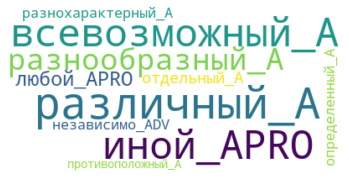

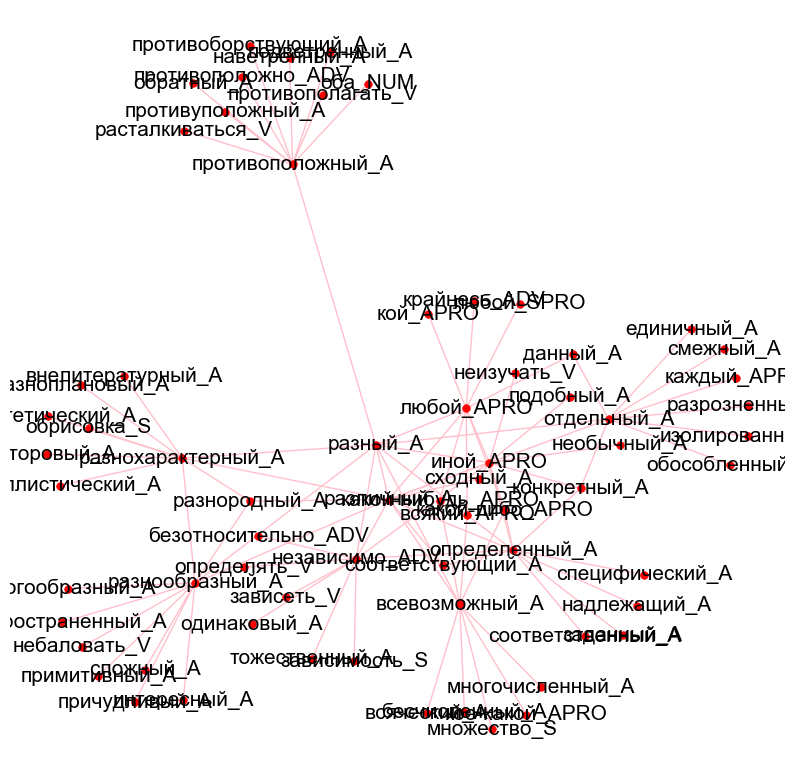

финальный_A


c:\users\vital\appdata\local\programs\python\python37-32\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


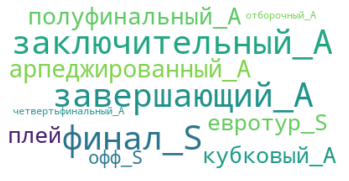

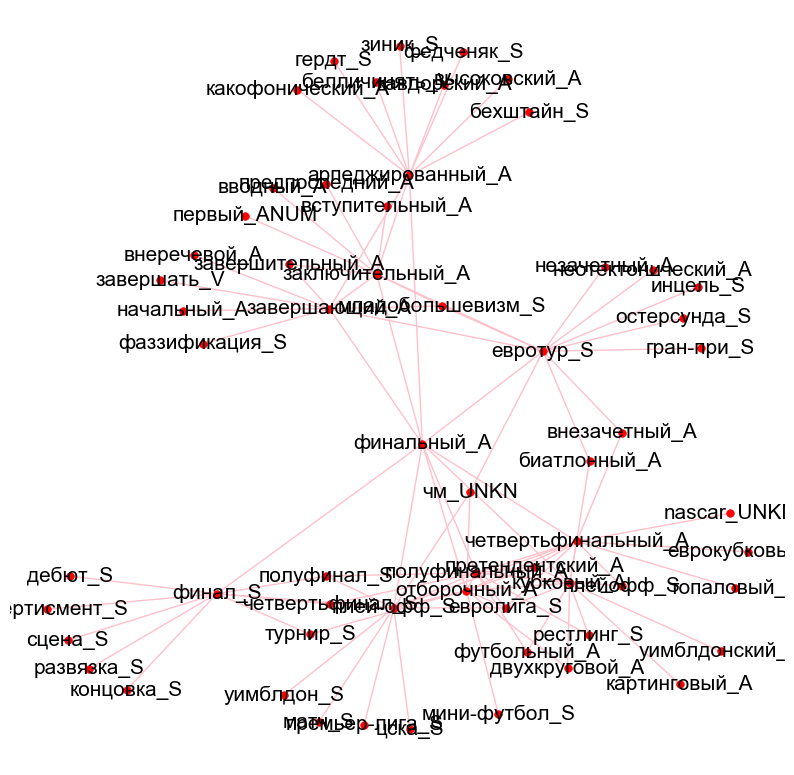

местный_A


c:\users\vital\appdata\local\programs\python\python37-32\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


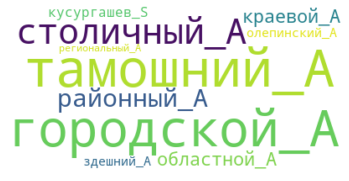

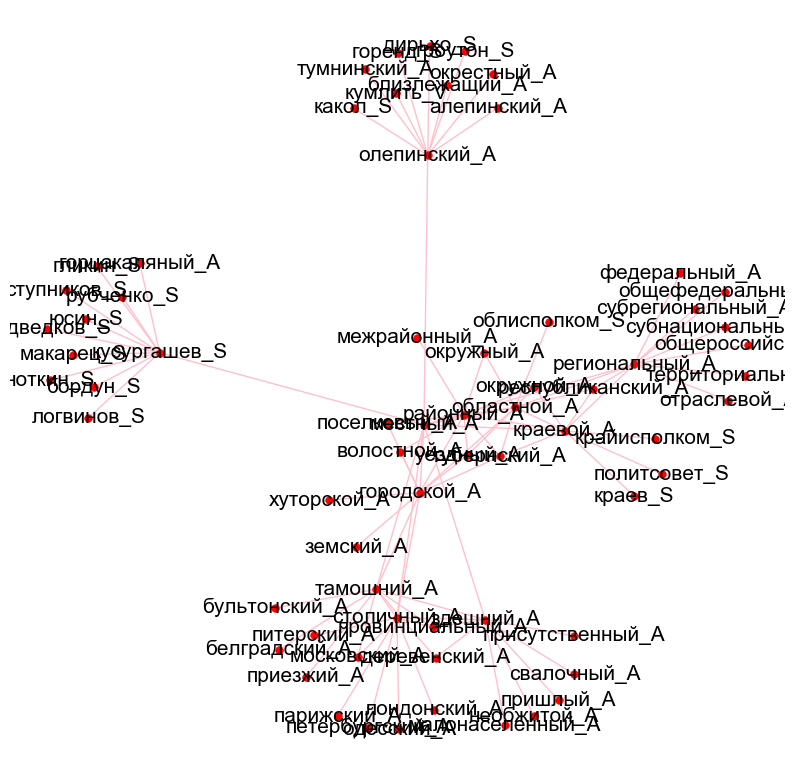

In [12]:
for i in words:
    word = i[:-4]
    name = i[-4:]
    filename = '%s.png' % name
    file_cloud = 'cloud_%s.png' % name
    G = nx.Graph()

    level_one = []
    word = str(word) + '_A'
    if word in model:
        print(word)
        syn_words = len(model[word])
        for i in model.most_similar(positive=[word], topn=10):
            level_one.append(i[0])
            G.add_node(i[0], label=str(i[0]))
            G.add_edge(str(word), str(i[0]))
    else:
        print('Увы, слова "%s" нет в модели!' % word)

    word_cloud = ' '.join(level_one)
    cloud = WordCloud(background_color='white')
    cloud.generate(word_cloud)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis("off")

    cloud.to_file('static/' + file_cloud)

    level_two = []
    for word in level_one:
        if word in model:
            for i in model.most_similar(positive=[word], topn=10):
                level_two.append(i[0])
                G.add_node(i[0], label=str(i[0]))
                G.add_edge(str(word), str(i[0]))
        else:
            print('Увы, слова "%s" нет в модели!' % word)

    style.use('ggplot')

    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 10), dpi=100)
    nx.draw_networkx_nodes(G, pos, node_color='red', node_size=30)
    nx.draw_networkx_edges(G, pos, edge_color='pink')
    nx.draw_networkx_labels(
                G, pos, font_size=15, font_family='Arial')
    plt.axis('off')
    plt.savefig('static/' + filename, format='png')
    plt.show()